In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

p1_link = 'https://raw.githubusercontent.com/evertacosta/Numerical_Methods_2022-1/main/Reto2/datos/Problema1_MN20221_WV_P2.adf'
p2_link = 'https://raw.githubusercontent.com/evertacosta/Numerical_Methods_2022-1/main/Reto2/datos/Problema2_MN20221_WV_P2.adf'
p3_link = 'https://raw.githubusercontent.com/evertacosta/Numerical_Methods_2022-1/main/Reto2/datos/Problema3_MN20221_WV_P2.adf'

In [239]:
def read_adf(file):
  return pd.read_csv(file, sep="\t", names=['time', 'voltage', 'current'], usecols=[0, 1, 2], skiprows=2)

problem_1_df = read_adf(p1_link)
problem_2_df = read_adf(p2_link)
problem_3_df = read_adf(p3_link)

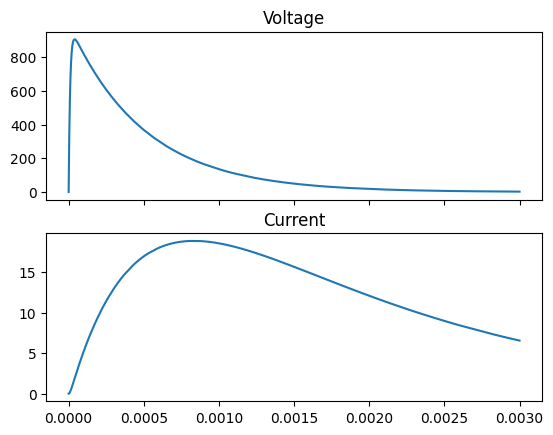

In [240]:

def basic_plot(dataframe):
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    ax1.plot('time', 'voltage', data=dataframe)
    ax1.set_title('Voltage')
    ax2.plot('time', 'current', data=dataframe)
    ax2.set_title('Current')

basic_plot(problem_1_df)

## Introduccion

In [241]:
def least_square_method(time, func, initial, final):
    # Función que modela el problema
    def y(theta, time):
        return func(time, theta)

    # Función de diferencia vectorial
    def fun_dif(theta):
        return y(theta, time) - final

    sol = optimize.least_squares(fun_dif, initial)
    return sol.x

def error_function(eq_args, eq, final_result, t_span, y0, time_eval):
    """

    :param eq_args:
    :param eq:
    :param final_result:
    :param t_span:
    :param y0:
    :param time_eval:
    :return:
    """
    sol = integrate.solve_ivp(eq, t_span, y0, t_eval=time_eval, args=tuple(eq_args))
    #print('len final y sol', len(final_result), len(sol), 'argumentos: tspan y time_eval', t_span, len(time_eval), 'args', tuple(eq_args))
    #print(sol)
    suma = 0
    nn = len(final_result)
    #print(sol)
    soly = sol.y[0]
    #print(len(sol.y))

    infinitos = 0

    if len(final_result) == len(soly):
        for i in range(nn):
            ei = (soly[i] - final_result[i]) ** 2
            suma = suma + ei
    else:
        suma = 0
        infinitos += 1

    error = suma / nn
    #print('infinitos encontrados', infinitos)
    return error

## Problema 1

Los valores de Amplitud, Alpha, y Betha para la funcion doble exponencial son
Amplitud:999.9999942086516 Alpha:1999.999982942766 Betha:99999.99942603617


C:\Users\Evert\AppData\Local\Temp\ipykernel_7368\532462176.py:38: RuntimeWarning: overflow encountered in double_scalars
  suma = suma + ei
C:\Users\Evert\AppData\Local\Temp\ipykernel_7368\532462176.py:37: RuntimeWarning: overflow encountered in double_scalars
  ei = (soly[i] - final_result[i]) ** 2
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Los valores encontrados para la resistencia y el inductor son: r:9.992236197870445, l:0.014974373549886308


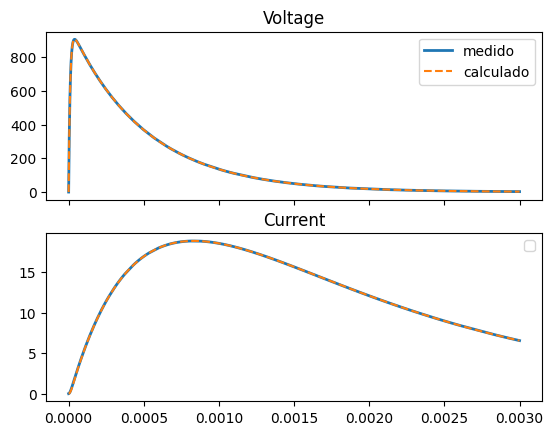

In [242]:
time1 = np.array(problem_1_df.time)
voltage1 = np.array(problem_1_df.voltage)
current1 = np.array(problem_1_df.current)

def source_voltaje_1(t, theta):
    e0, a, b = theta
    return e0*(np.exp(-a*t) - np.exp(-b*t))

voltage_source_values1 = least_square_method(time1, source_voltaje_1, [1, 1, 1], voltage1)

print("Los valores de Amplitud, Alpha, y Betha para la funcion doble exponencial son")
print("Amplitud:{} Alpha:{} Betha:{}".format(voltage_source_values1[0], voltage_source_values1[1], voltage_source_values1[2]))

def rl_equation(t, i, r, li):
    e0, a, b = voltage_source_values1
    vs = e0 * (np.exp(-a * t) - np.exp(-b * t))
    di = (vs - r*i)/li
    return di

res1 = optimize.minimize(error_function, [1, 0.1], args=(rl_equation, current1, (0, 0.003), [0], time1), method='Powell')
#print(res1)
print("Los valores encontrados para la resistencia y el inductor son: r:{}, l:{}".format(res1.x[0], res1.x[1]))
sol1 = integrate.solve_ivp(rl_equation, (0.0, 0.003), [0], t_eval=time1, args=tuple(res1.x))


def comparacion1():
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    ax1.plot(time1, voltage1, label='medido', lw=2)
    ax1.plot(time1, source_voltaje_1(time1, voltage_source_values1), '--', label='calculado')
    ax1.set_title('Voltage')
    ax1.legend()

    ax2.plot(time1, current1, lw=2, label='calculado')
    ax2.plot(sol1.t, sol1.y[0], '--', label='medido')
    ax2.set_title('Current')
    ax2.legend()
comparacion1()

## Problema 2

Los valores de Amplitud, Frecuendia, y Angulo de desfase para el voltaje de entrada senosoidal son
Amplitud:99.98136028833478 Frecuencia:60.006411094926754 Angulo:-2.8299781968721995
Los valores encontrados para la resistencia, el inductor y el capacitor son: r:3.886490896287947, l:0.10001841975049418 y c:1.0032711191141092e-05


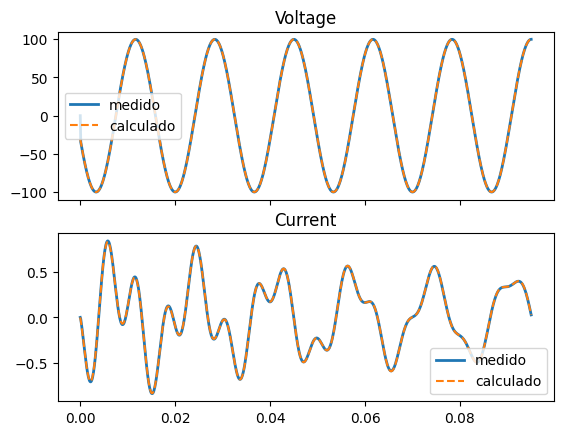

In [243]:
time2 = np.arange(0, 0.0951, 0.0001)
voltage2 = np.array(problem_2_df.voltage)[50:]
current2 = np.array(problem_2_df.current)[50:]

def source_voltaje_2(t, theta):
    am, f, a = theta
    w = np.pi*2*f
    return am*np.sin(t*w + a)


voltage_source_values2 = least_square_method(time2, source_voltaje_2, [99, 55, 0.1], voltage2)

print("Los valores de Amplitud, Frecuendia, y Angulo de desfase para el voltaje de entrada senosoidal son")
print("Amplitud:{} Frecuencia:{} Angulo:{}".format(voltage_source_values2[0], voltage_source_values2[1], voltage_source_values2[2]))


def rlc_equation(t, y, r, l, c):
    am, f, a = voltage_source_values2
    w = np.pi * 2 * f
    vs = am * np.sin((t*w) + a)

    Is, Vc = y  # corriente del circuito, voltaje en condensador

    di = (1 / l) * (vs - r*Is - Vc)
    dvc = (1/c) * Is
    return [di, dvc]

res2 = optimize.minimize(error_function, np.array([1, 0.095, 9e-6]), args=(rlc_equation, current2, (0, 0.095), [0, 0], time2), method='Powell')
#print(res2)
print("Los valores encontrados para la resistencia, el inductor y el capacitor son: r:{}, l:{} y c:{}".format(res2.x[0], res2.x[1], res2.x[2]))
sol2 = integrate.solve_ivp(rlc_equation, (0, 0.095), [0, 0], t_eval=time2, args=tuple(res2.x))

def comparacion2():
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    ax1.plot(time2, voltage2, label='medido', lw=2)
    ax1.plot(time2, source_voltaje_2(time2, voltage_source_values2), '--', label='calculado')
    ax1.set_title('Voltage')
    ax1.legend()

    ax2.plot(time2, current2, label='medido', lw=2)
    ax2.plot(sol2.t, sol2.y[0], '--', label='calculado')
    ax2.set_title('Current')
    ax2.legend()


comparacion2()